# 1  Automated data cleaning for chest Xrays with cleanX: example code using classes

Work by Candace Makeda Moore, MD, Oleg Sivokon, Andrew Murphy Please note this workflow does not cover the whole scope of cleanX, and is only meant to show some of the functionality that can be accomplished using the classes in cleanX. It is essentially a workflow that can easily automate many tasks if a programmer is making many ML products from medical images.

Please to note this workflow is currently (23/1/2022) designed for cleanX version 0.1.13. As functions may update, this workflow is meant to give a general idea on how to use the latest version of cleanX, but may need to be changed as functions update. 

In [1]:
import sys
sys.path = ['D:/projects/cleanX'] + sys.path

In [2]:
import pandas as pd
import os

In [3]:


from cleanX import (
    dataset_processing as csvp,
    dicom_processing as dicomp,
    image_work as iwork,
)

## DICOM files

An example of using the dicom_processing to get a dataframe of data , and an image from a DICOM file.

In [4]:
from cleanX.dicom_processing import DicomReader

In [5]:
def pydicom_missing():
    try:
        import pydicom
        return False
    except ModuleNotFoundError:
        
        return True
pydicom_missing()    

False

In [6]:
dicomfile_directory1 = "dicom_example_folder"
source_column = 'file'
reader = dicomp.pydicom_adapter.PydicomDicomReader(
        exclude_fields=('PatientName',),
    )
source = dicomp.DirectorySource(dicomfile_directory1, source_column)
df = reader.read(source)
df

,file,NumberOfEnergyWindows,SOPInstanceUID,SeriesInstanceUID,ManufacturerModelName,NumberOfFrames,ImagesInAcquisition,PatientSex,PatientWeight,InstanceNumber,...,SpecificCharacterSet,Columns,PatientID,DetectorVector,PatientSize,SamplesPerPixel,SmallestImagePixelValue,ActualFrameDuration,SeriesTime,StationName
0,IM-0001-0002.dcme3cbbe6b-2d21-4798-a27a-10226c...,1,1.3.12.2.1107.5.6.1.123.24412.0.231616112282440,1.3.12.2.1107.5.6.1.123.24412.0.231616727483060,IP2,1,3,F,40.0,2,...,ISO_IR 100,256,SIEMENS,1,1.5,1,0,132121,153319.140000,ECAM6653
1,IM-0001-0003.dcma8cf5740-b518-4e91-be5e-3b6cdb...,1,1.3.12.2.1107.5.6.1.123.24412.0.231081423202127,1.3.12.2.1107.5.6.1.123.24412.0.231616727483060,IP2,1,3,F,40.0,3,...,ISO_IR 100,256,SIEMENS,1,1.5,1,0,131348,153319.140000,ECAM6653
2,IM-0001-0004.dcm0a117e34-be84-4fa8-993d-249927...,1,1.3.12.2.1107.5.6.1.123.24412.0.231019730551383,1.3.12.2.1107.5.6.1.123.24412.0.231737174002313,IP2,1,1,F,40.0,1,...,ISO_IR 100,256,SIEMENS,1,1.5,1,0,60003,152842.140000,ECAM6653


In [7]:
output_folder = 'test'
try: 
    os.mkdir(output_folder)
except FileExistsError:
    pass 

rip = dicomp.rip_out_jpgs
jpg = rip(dicomfile_directory1,output_folder)

2 image converted


It worked, I checked ;) New images are in my test_rip_out_images folder! You can change the output folder and check on your computer as well. 

## Datasets

In [8]:
from cleanX.dataset_processing import MLSetup

In [9]:
# for the sake of the demo we will use nearly the same train and test source 
# i.e. all thousands of images are leaked images between test and train
# setup parameters = train, test, uniqueID, sensitive list 
setup = MLSetup(
    'example_csv.csv',
    'duped1.csv',
    unique_id='X_ray_image_name',
    label_tag='Label',
    sensitive_list=['gender'],
)
report = setup.generate_report()
report.to_ipwidget()

In [10]:
setup = MLSetup(
    'example_csv.csv',
    'duped1.csv',
    unique_id='X_ray_image_name',
    label_tag='Label',
    sensitive_list=['gender'],
)
report = setup.generate_report()
print(report.to_text())

Duplicates
    Train Duplicates Count: 0
    Duplicated train names
    ----------------------
        Empty DataFrame
        Columns: [X_ray_image_name, Label, Dataset_type, Label_2_Virus_category, Label_1_Virus_category, gender]
        Index: []

    Test Duplicates Count: 1
    Duplicated test names
    ---------------------
           Unnamed: 0.1 Unnamed: 0   X_ray_image_name   Label Dataset_type  \
        1             0          0  IM-0128-0001.jpeg  Normal        TRAIN   

          Label_2_Virus_category Label_1_Virus_category gender  
        1                    NaN                    NaN   Male  


Leakage
    Leaked entries
    --------------
                        X_ray_image_name   Label_x Dataset_type_x  \
        0              IM-0128-0001.jpeg    Normal          TRAIN   
        1              IM-0128-0001.jpeg    Normal          TRAIN   
        2              IM-0127-0001.jpeg    Normal          TRAIN   
        3              IM-0125-0001.jpeg    Normal       

## Images


The image workflow is continually under development . To get the most updated functions you may need to check the code. These are updated as of 23/1/2022.

In [11]:

from cleanX.image_work import (
    Pipeline,
    Acquire,
    BlackEdgeCrop,
    WhiteEdgeCrop,
    Normalize,
    HistogramNormalize,
    Save,
    DirectorySource,
)

In [12]:
# there is an image directory with 9 images for a quick demo
image_directory = 'tzim'
# reccomend to put in an empty new directory for pipeline to work!
pipeline_output = 'helo_tzim'

try: 
    os.mkdir(pipeline_output)
except FileExistsError:
    pass 

src_dir = image_directory

In [13]:
d_images = iwork.image_functions.dataframe_up_my_pics(image_directory, 'Normal')
d_images_list = d_images.identifier_pic_name.to_list()

final_names = []
for image_string in d_images_list:
    final_names.append(os.path.join(image_directory, image_string))

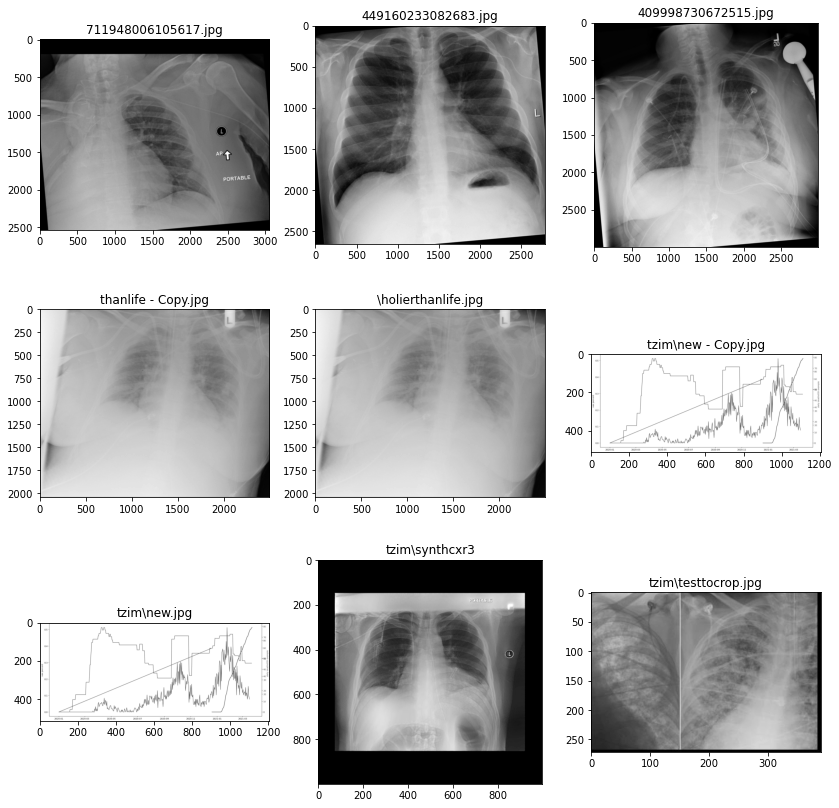

In [14]:
iwork.show_images_in_df(final_names,19)

In [15]:
src = DirectorySource(src_dir)
nd = pipeline_output
p = Pipeline(steps=(
    Acquire(),
    BlackEdgeCrop(),
    HistogramNormalize(2.5),
    Save(nd),
        
))
p.process(src)
src_files = set(f for f in os.listdir(src_dir) if f.endswith('.jpg'))
dst_files = set(os.listdir(nd))

In [16]:
n_images = iwork.dataframe_up_my_pics(pipeline_output, 'Normal')
n_images_list = n_images.identifier_pic_name.to_list()
fix_names = []
for image_string in n_images_list:
    fix_names.append(os.path.join(pipeline_output, image_string))

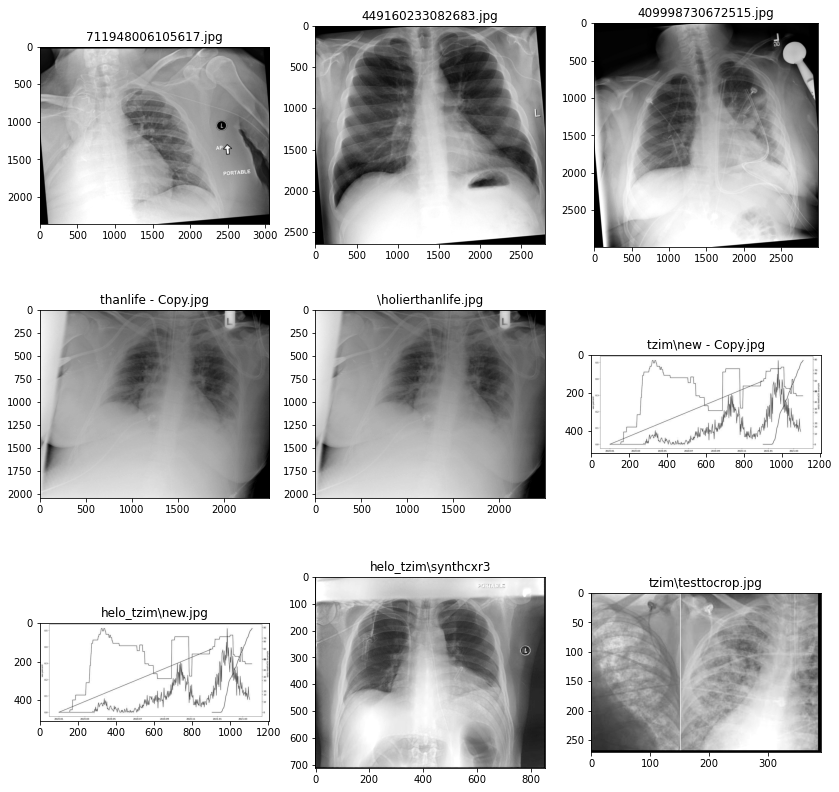

In [17]:
iwork.show_images_in_df(fix_names,19)

## Showing or "watermarking" environment: I include my packages here:

Expose original author environment:
You can rerun to expose your own if you happen to have makedalytics, or alternatively use watermark, a far more popular package, which will expose versions on what you ask it to expose (example below)

In [18]:
# ##To expose user environment, use watermark or get makedalytics, uncomment and run:
# import makedalytics as ma
# ma.packages_to()

In [19]:

import watermark
%load_ext watermark
%watermark -v -m -p cleanX,SimpleITK,numpy,matplotlib,pandas



Python implementation: CPython
Python version       : 3.9.0
IPython version      : 8.0.1

cleanX    : 0.1.3
SimpleITK : 2.1.0
numpy     : 1.22.0
matplotlib: 3.5.1
pandas    : 1.4.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores   : 12
Architecture: 64bit



There are many additional functions in cleanX to clean images for a closer look at some of the functions to clean images check out the class-less notebook. You can learn more about cleanX's other functions in the other notebooks [here](https://github.com/drcandacemakedamoore/cleanX/blob/main/workflow_demo/no_classes_workflow_example.ipynb) and [here](https://github.com/drcandacemakedamoore/cleanX/blob/main/workflow_demo/bias_not.ipynb).